## Problem Statement :

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### Features:

1.country : Name of the country

2.child_mort : Death of children under 5 years of age per 1000 live births

3.exports : Exports of goods and services per capita. Given as %age of the GDP per capita

4.health : Total health spending per capita. Given as %age of GDP per capita

5.imports : Imports of goods and services per capita. Given as %age of the GDP per capita

6.income : Net income per person

7.inflation : The measurement of the annual growth rate of the Total GDP

8.life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same

9.total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.    

10.gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.    

## Importing Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,cophenet,linkage,cut_tree
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_country=pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_country.shape

(167, 10)

###### Inference : There are 167 rows and 10 columns in the dataset.

In [4]:
df_country['country'].nunique()

167

In [5]:
df_country.set_index(df_country['country'],inplace=True)

In [6]:
df_country.drop(columns=['country'],inplace=True)

In [7]:
df_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###### Inference : Since all the values in the 'country' variable are unique we convert it into index.

## Null Value Treatment:

In [8]:
df_country.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

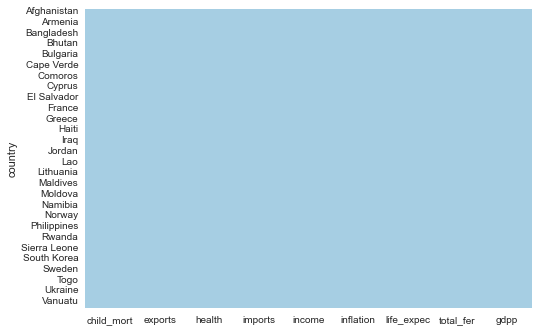

In [9]:
sns.heatmap(df_country.isnull(),cbar=False,cmap='Paired')
plt.show()

###### Inference : No null values present in the dataset. Hence no treatment required.

## Outlier Treatment :

<AxesSubplot:>

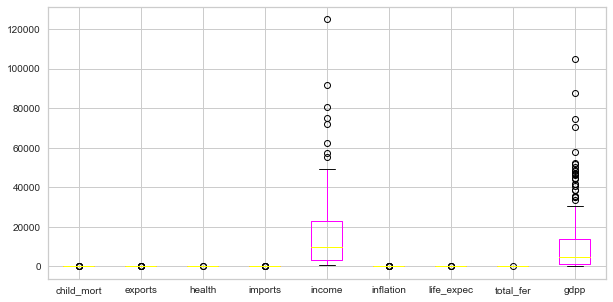

In [10]:
df_country.plot(kind='box',figsize=(10,5),cmap='spring')

######  Inference :Some of the variables have outliers in them such as 'income'  & 'gdpp' .However this may contribute to some valuable information like in certain countries people get much higher income which also may contribute to a higher gdpp so the outliers are not removed in this case.

## Data Preprocessing : 

In [11]:
mn=MinMaxScaler()
df_country_scaled=pd.DataFrame(mn.fit_transform(df_country),index=df_country.index,columns=df_country.columns)
df_country_scaled.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833


###### Inference : Clustering requires the data to be converted to a common scale so as to calculate the distance from a given point to the centroid.Therefore the data is scaled using MinMaxScaler

## KMeans Clustering :

#### Choosing optimum value for the number of clusters :

###### a. Using Elbow plot :

In [12]:
wcss=[]
for cluster in range(2,7):
    kmeans=KMeans(n_clusters=cluster,random_state=10)
    kmeans.fit(df_country_scaled)
    wcss.append(kmeans.inertia_)
wcss

[25.942443326223344,
 19.345118591450642,
 16.781002591696133,
 14.966814843024192,
 13.693123497046212]

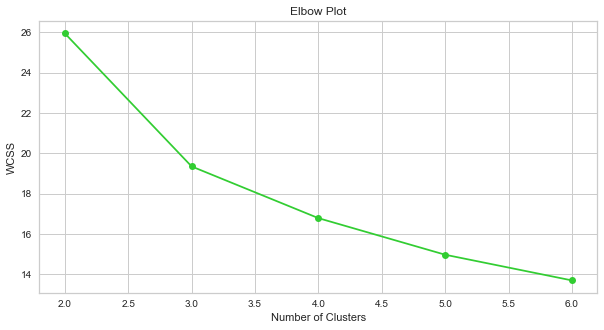

In [13]:
plt.figure(figsize=(10,5))
plt.plot(range(2,7),wcss,marker='o',color='limegreen')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot")
plt.show()

###### Inference : As per the plot, the elbow is formed at number of clusters 3. To confirm this result we plot sillouette plots .

###### b.Using Sillouette Plots

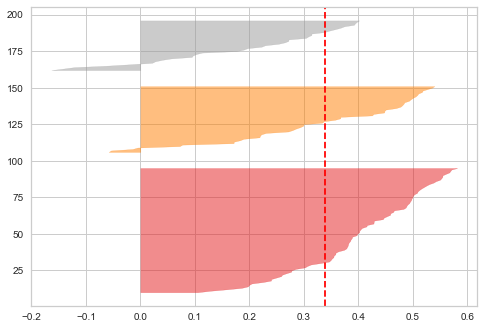

In [14]:
kmeans=KMeans(n_clusters=3,random_state=10)
kmeans.fit(df_country_scaled)
viz=SilhouetteVisualizer(kmeans)
viz.fit(df_country_scaled)
plt.show()

###### Inference :Since we didn't treat outliers the clusters have outliers in them . Further perforrming Kmeans clustering using number of clusters as 3 and interpreting results.

In [15]:
kmeans_3=KMeans(n_clusters=3,random_state=10)
kmeans_3.fit(df_country_scaled)

KMeans(n_clusters=3, random_state=10)

In [16]:
df_country_scaled['Cluster']=kmeans_3.labels_
df_country['Cluster']=kmeans_3.labels_
df_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


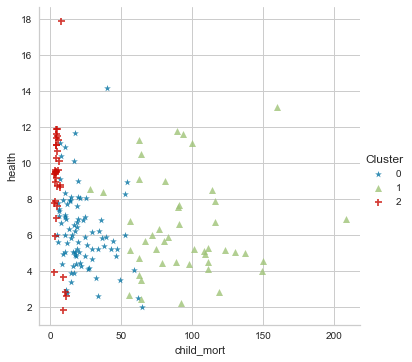

In [17]:
sns.lmplot(x = 'child_mort', y = 'health', data = df_country, hue = 'Cluster', 
                markers = ['*', '^', '+'], fit_reg = False, size = 5,)
plt.show()

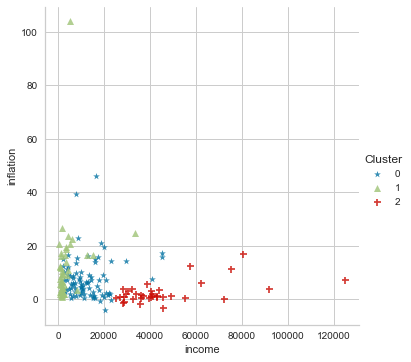

In [18]:
sns.lmplot(x = 'income', y = 'inflation', data = df_country, hue = 'Cluster', 
                markers = ['*', '^', '+'], fit_reg = False, size = 5,)
plt.show()

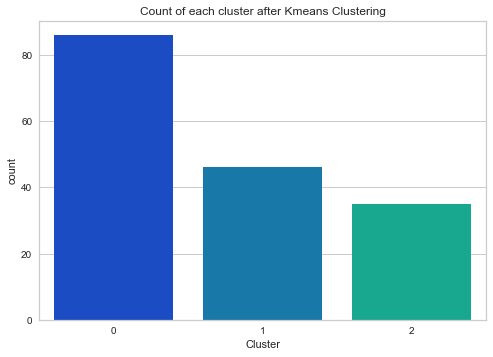

In [19]:
sns.countplot(df_country['Cluster'],palette='winter')
plt.title("Count of each cluster after Kmeans Clustering")
plt.show()

In [20]:
df1=pd.DataFrame(df_country['Cluster'].value_counts())
df1

,Cluster
0,86
1,46
2,35


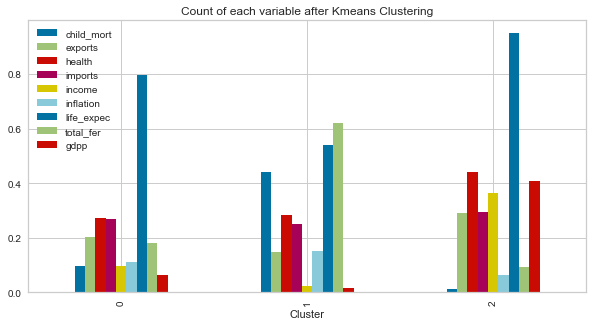

In [21]:
df_country_scaled.groupby('Cluster').mean().plot(kind='bar',figsize=(10,5))
plt.title("Count of each variable after Kmeans Clustering")
plt.show()

In [22]:
df_country.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
1,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
2,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857


#### Analysis of Cluster 0:

In [23]:
print("The countries within this cluster are:\n",list(df_country[df_country['Cluster']==0].index))

The countries within this cluster are:
 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Ton

In [24]:
print("Nmber of countries within this cluster:",len(df_country[df_country['Cluster']==0].index))

Nmber of countries within this cluster: 86


###### Inference :The attributes within this cluster exhibit a medium rate regarding all features that is the exports,imports,income,life expectency and so on .So we can say that the developemnets of the countries within this cluster is average.

#### Analysis of Cluster 1:

In [25]:
print("The countries within this cluster are:\n",list(df_country[df_country['Cluster']==1].index))

The countries within this cluster are:
 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [26]:
print("Nmber of countries within this cluster:",len(df_country[df_country['Cluster']==1].index))

Nmber of countries within this cluster: 46


###### Inference :The mean value of features within this cluster such as exports,imports,income and so on are the lowest among all clusters and the child mortality rate is the highest which means the countries within this cluster are the least developed countries and need to be assisted and provied with the necessary help they require. 

#### Analysis of Cluster 2:

In [27]:
print("The countries within this cluster are:\n",list(df_country[df_country['Cluster']==2].index))

The countries within this cluster are:
 ['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']


In [28]:
print("Nmber of countries within this cluster:",len(df_country[df_country['Cluster']==2].index))

Nmber of countries within this cluster: 35


###### Inference : The countries within this cluster have the highest mean with respect to all the features which means these countries belong to the highly developed category and having the lowest child mortality rate. The countries belonging to this cluster are the ones that aid the countries belonging to cluster 0 and 1 with the necessary help they need.

## Aglomerative  Hierarchical Clustering :

##### Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [29]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(df_country_scaled)
print(eucli_dist)

[[0.         1.31853769 1.24587877 ... 1.31548371 0.40426303 0.22412638]
 [1.31853769 0.         0.2957055  ... 0.31085967 1.15853848 1.30754253]
 [1.24587877 0.2957055  0.         ... 0.41013299 1.07077706 1.21766823]
 ...
 [1.31548371 0.31085967 0.41013299 ... 0.         1.16511593 1.29188431]
 [0.40426303 1.15853848 1.07077706 ... 1.16511593 0.         0.36781892]
 [0.22412638 1.30754253 1.21766823 ... 1.29188431 0.36781892 0.        ]]


In [30]:
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(167, k = 1)]
print(dist_array)

[1.31853769 1.24587877 0.44699259 ... 1.16511593 1.29188431 0.36781892]


In [31]:
dict_cop={'single':[],'complete':[],'average':[],'ward':[]}
methods=['single','complete','average','ward']
for item in methods:
    link_mat = linkage(df_country_scaled, method = item,metric='euclidean')
    coeff,cophenet_dist=cophenet(link_mat,dist_array)
    dict_cop[item].append(coeff)
dict_cop

{'single': [0.9041587892163988],
 'complete': [0.9442812240106604],
 'average': [0.949277335959132],
 'ward': [0.8510317579533244]}

###### Inference : The 'average' method has the highest score and thus seems most suitable to use.

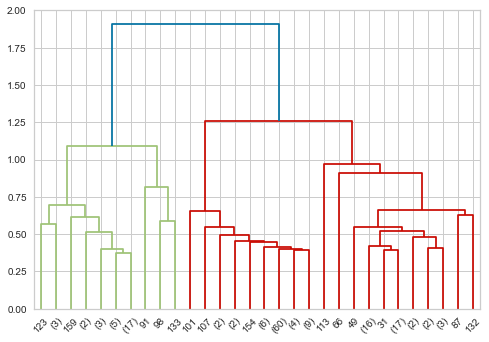

In [32]:
# Building a dendrogram using Linkage with average method
den=dendrogram(linkage(df_country_scaled, method ='average',metric='euclidean'),truncate_mode='lastp')

###### Inference : As per the dendrogram above the correct number of clusters to cluster the data into would ve 3.

In [33]:
df_country.drop(columns=['Cluster'],inplace=True)

In [34]:
df_country_scaled.drop(columns=['Cluster'],inplace=True)

In [35]:
agloh=AgglomerativeClustering(n_clusters=3,linkage='ward')
agloh.fit(df_country_scaled)

AgglomerativeClustering(n_clusters=3)

In [36]:
df_country_scaled['Cluster']=agloh.labels_
df2=pd.DataFrame(df_country_scaled['Cluster'].value_counts().sort_index())
df2

,Cluster
0,34
1,41
2,92


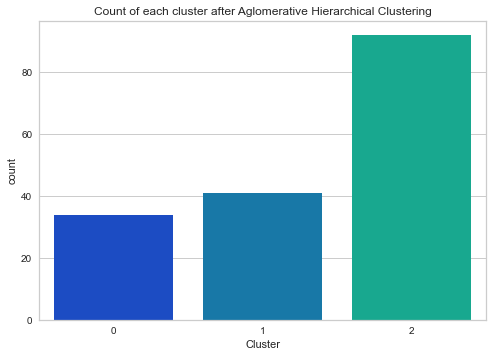

In [37]:
sns.countplot(df_country_scaled['Cluster'],palette='winter')
plt.title("Count of each cluster after Aglomerative Hierarchical Clustering")
plt.show()

## DBSCAN Clustering :

In [38]:
df_country_scaled.drop(columns=['Cluster'],inplace=True)

In [39]:
dbscan=DBSCAN(eps=0.2,min_samples=10)
dbscan.fit(df_country_scaled)


DBSCAN(eps=0.2, min_samples=10)

In [40]:
df_country_scaled['Cluster']=dbscan.labels_

In [41]:
df_country_scaled['Cluster'].value_counts()


-1    82
 0    69
 1    16
Name: Cluster, dtype: int64

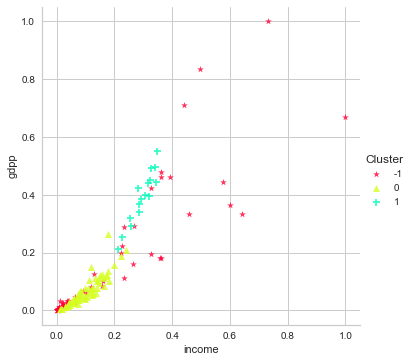

In [42]:
sns.lmplot(x = 'income', y = 'gdpp', data = df_country_scaled, hue = 'Cluster', 
                markers = ['*', '^', '+'], fit_reg = False, size = 5,palette='gist_ncar_r')
plt.show()

###### -1 cluster states outliers in the dataset.

In [43]:
df3=pd.DataFrame(df_country_scaled['Cluster'].value_counts())
df3.index=df3.index+1
df3

,Cluster
0,82
1,69
2,16


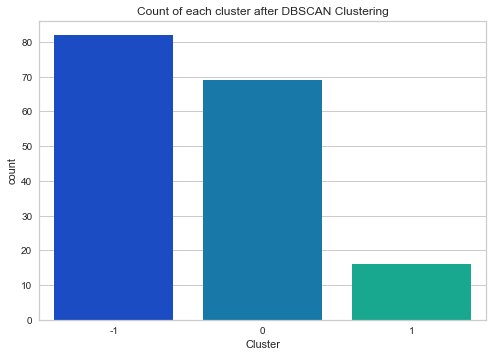

In [44]:
sns.countplot(df_country_scaled['Cluster'],palette='winter')
plt.title("Count of each cluster after DBSCAN Clustering")
plt.show()

## Comparison of Clusters :

In [47]:
clusters=pd.concat([df1,df2,df3],axis=1)
clusters.columns=['Kmeans','Aglomerative','DBSCAN']
clusters

,Kmeans,Aglomerative,DBSCAN
0,86,34,82
1,46,41,69
2,35,92,16


<AxesSubplot:>

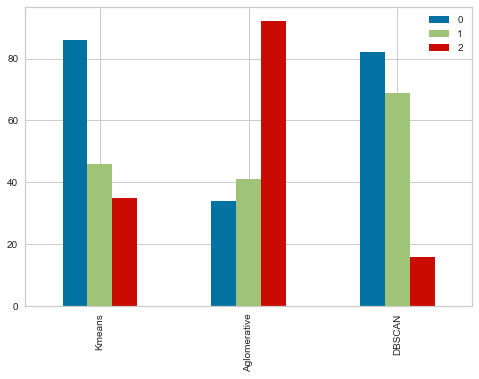

In [48]:
clusters.T.plot(kind='bar')

###### As per the plot above the Kmeans Clustering and DBSCAN clustering give an almost similar result with respect to the value counts of each cluster. So either of the two methods can be used to cluster the countries so as to categorise them into least developed ,moderately developed and highly developed countries.